
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 


Using TensorFlow backend.


In [2]:
def buildModel():
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()

    #   第二步：構建網絡層

    model.add(Dense( 500,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 500)) # 隱藏層節點500個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    # 模型建立完成後，統計參數總量
    print("Total Parameters：%d" % model.count_params())
    # 輸出模型摘要資訊
    model.summary()
    
    return model

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_graph(history, modelName):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy - {0}'.format(modelName))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss - {0}'.format(modelName))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [4]:
def get_data():
    #  第四步：資料分割
    # 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
    (X_train, y_train), (X_test, y_test) = mnist.load_data() 

    # 由於mist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2 ])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2 ])  
    Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
    Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)
    
    return X_train, X_test, Y_train, Y_test

In [5]:
'''
Adam
'''
adam = optimizers.Adam(lr=0.001, epsilon=None, decay=0.0) 

'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) 
    
'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''
rmsprop = optimizers.RMSprop(lr=0.001, epsilon=None, decay=0.0) 

opts = [(adam, "Adam"), (sgd, "SGD"), (rmsprop, "RMSprop")]

Instructions for updating:
Colocations handled automatically by placer.


Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)           

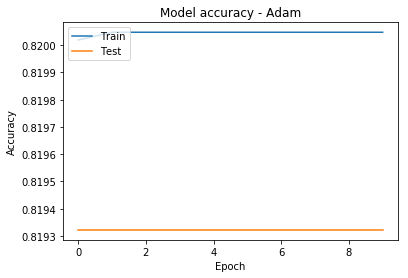

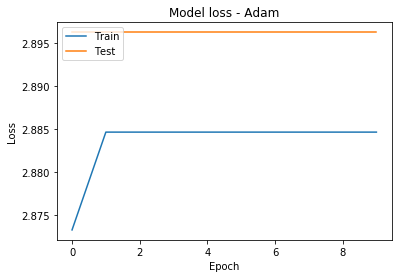

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_6 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_7 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_8 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)           

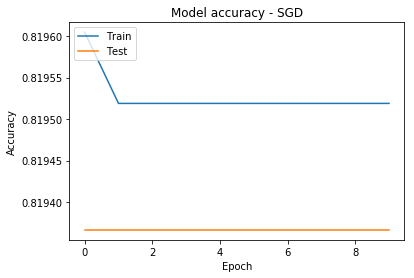

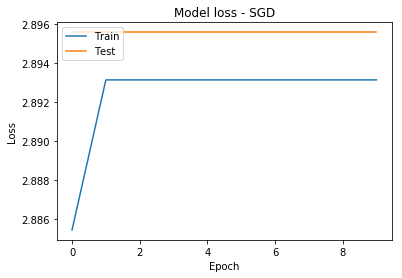

Total Parameters：1149010
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 500)               392500    
_________________________________________________________________
activation_11 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_12 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               250500    
_________________________________________________________________
activation_13 (Activation)   (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 500)           

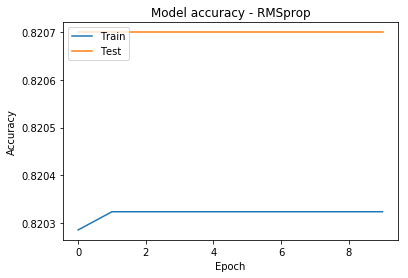

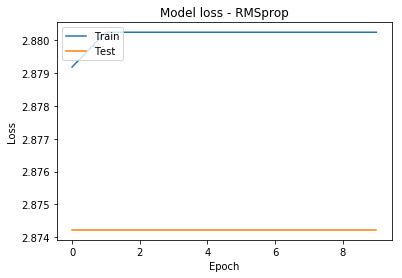

In [6]:
'''
   宣告並設定
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   
''' 
batch_size=256
epochs=10

# 第五步：訓練, 修正 model 參數
#Blas GEMM launch failed , 避免動態分配GPU / CPU, 出現問題
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

X_train, X_test, Y_train, Y_test = get_data()

# 第三步：編譯, 
for opt, modelName in opts:
    model = buildModel()

    model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    history = model.fit(X_train,Y_train,batch_size = batch_size, epochs=epochs, shuffle=True,verbose=0,validation_split=0.3 )
    
    #    第六步：輸出
    print ( " test set " )
    scores = model.evaluate(X_test,Y_test)
    print ( "" )
    print ( " The test loss = {0}, accuracy = {1}".format(scores[0], scores[1]))
    
    plot_graph(history, modelName)
    
    # Test predict results
#     predict_res = model.predict(X_test)
#     predict_max = numpy.argmax(predict_res, axis = 1)
#     predict_per = sum(predict_max == Y_test) / len(Y_test)
    
#     print ( " The predict accuracy = {0}".format(predict_per))